# Базовая обработка текста

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://www.nltk.org/api/nltk.html
* https://pymorphy2.readthedocs.io/en/stable/
* https://docs.python.org/3/library/re.html
* https://regex101.com/

## Задачи для совместного разбора

1. Найдите все суммы (число плюс валюта), которые упоминаются в данном тексте. Выведите результат в виде списка кортежей из двух элементов (число, валюта)

In [ ]:
text = '''During my trip to Europe, I exchanged $10.50 for €20,00 at the currency exchange booth.
With ¥5000, I bought some souvenirs from a local market.
Later, I treated myself to a delicious meal at a restaurant, which cost me £15,99.
Finally, I converted 100₹ into the local currency to buy a traditional Indian artwork.'''

In [ ]:
import re

In [ ]:
patt = re.compile(r"([$€¥₹£]?)(\d+[.,]?\d*)([$€¥₹£]?)")

In [ ]:
patt.findall(text)

[('$', '10.50', ''),
 ('€', '20,00', ''),
 ('¥', '5000,', ''),
 ('£', '15,99', ''),
 ('', '100', '₹')]

In [ ]:
[
    (x1 or x3, float(x2.replace(",", ".")))
    for x1, x2, x3 in patt.findall(text)
]

[('$', 10.5), ('€', 20.0), ('¥', 5000.0), ('£', 15.99), ('₹', 100.0)]

In [ ]:
True and False and True

False

In [ ]:
bool('')

False

2\. Выясните, встречается ли в представленном фрагменте текста тавтология.

In [ ]:
from nltk import RegexpTokenizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
sw = stopwords.words("english")

In [ ]:
tokenizer = RegexpTokenizer(r"\w+")
stemmer = SnowballStemmer("english")
words = [
    stemmer.stem(word)
    for word in tokenizer.tokenize(text)
    if word.lower() not in sw
]

In [ ]:
from collections import Counter
Counter(words).most_common(5)

[('exchang', 2), ('currenc', 2), ('local', 2), ('trip', 1), ('europ', 1)]

## Задачи для самостоятельного решения

In [111]:
import pandas as pd
import torch
import pymorphy2
import re
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ma2si\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<p class="task" id="1"></p>

1\. Исследуйте, какие формы слова "кот" или "кошка" встречаются в текстах из файла `moya-semia/Лучше кошки зверя нет 2.csv`. Сгруппируйте найденные слова по начальной форме и представьте результата в виде словаря, где ключом является начальная форма слова, а значением - список форм этого слова, которые встретились в тексте. Примеры подходящих слов: "котейки", "кошечка", "котик" и т.д.

In [46]:
csv_file_path = 'data/moya-semia/Лучше кошки зверя нет 2.csv'

df = pd.read_csv(csv_file_path, header=None)
df = df.rename (columns= {1: 'text'})

df = df.drop(columns=[0, 2])
df.head()

,text
0,Завтра мои котейки идут к врачу. А 21-го жду и...
1,Котя скучает по мужу. Со вторника спит на его ...
2,"Получилось так, что мне пришлось ""отдать"" мою ..."
3,Лучше всего для начала спросить об этом у люде...
4,"что волонтеры принесут, то и насыпалиЗначит, к..."


In [6]:
morph = pymorphy2.MorphAnalyzer()

slovar = {}

def get_base_form(word):
    parsed_word = morph.parse(word)[0]
    return parsed_word.normal_form

def delete_punkt(text):
    return re.sub(r'[.,!?()[\]{}":;*/]', ' ', text)

for text in df['text']:
    text = delete_punkt(text)
    words = text.split()
    for word in words:
        word = word.lower()

        nach_forma = get_base_form(word)

        if nach_forma in slovar:
            if word not in slovar[nach_forma]:
                slovar[nach_forma].append(word)
        else:
            slovar[nach_forma] = [word]

In [8]:
# Вы уже засчитали это решение на семинаре
for nach_forma, forma in slovar.items():
    if nach_forma.startswith('кот') or nach_forma.startswith('кош'):
        print(f"{nach_forma}: {', '.join(forma)}")

котейка: котейки, котейке, котейку, котейка, котейками, котеек
кот: коты, кот, коту, котов, котом, кота, котам, котами, коте, котах
котить: котя
кошка: кошку, кошка, кошки, кошек, кошкой, кошками, кошке, кошкам, кошкою
котик: котики, котикам, котиком, котик, котику, котика, котиками, котиков
который: которые, которого, который, которым, которая, которой, которыми, которую, которых, которое, котором, которому
кошелёк: кошелек, кошельку
котосессия: котосессии
кот-: кот-
коть: коти, котю
кошь: кошь
котенёк: котенька, котеньку, котеньки, котенек, котеньке
котячий: котячью, котячьей, котячьего, котячьи, котячья, котячьим, котячьем
котёнок: котенок, котенка, котенком, котят, котёнку, котята, котятами, котятам, котёнка, котёнок, котенку, котёнком, котёнке
котофеевич: котофеевич
котярый: котяра, котярой
кошачий: кошачью, кошачьи, кошачье, кошачий, кошачья, кошачьими, кошачьих, кошачьему, кошачьим, кошачьего, кошачьей, кошачьем
кошак: кошаки, кошака, кошак, кошакам, кошаков, кошаками
кошечка: к

<p class="task" id="2"></p>

2\. Получите и выведите на экран набор имён питомцев, упомянутых в текстах из файла `moya-semia/Лучше кошки зверя нет 2.csv`. Для простоты считайте, что имя питомца начинается с заглавной буквы и стоит не в начале предложения.

In [37]:
names = []

def find_names(text):
    sentences = sent_tokenize(text)  
    
    for sentence in sentences:
        words = word_tokenize(sentence)  
        for word in words[1:]: 
            if word[0].isupper():
                names.append(word)
    return

df['text'].apply(find_names)

In [32]:
print(f"10 случайных имён: {np.random.choice(names, size=10)}")
print(f"Всего имён: {len(set(names))}")

10 случайных имён: ['Ну' 'Персик' 'Эммануил' 'Нона' 'Бельчик' 'Пятнаша' 'Маруся'
 'Тосей.Такая' 'Что' 'Бусена']
Всего имён: 1689


<p class="task" id="3"></p>

3\. Вычислите среднюю длину сообщения (в количестве предложений) в различных темах форума газеты "Моя Семья" (каждый файл из каталога `data/moya-semia` соответствует отдельной теме". Представьте результат в виде столбчатой диаграммы. Подпишите рисунок и дайте названия осям.  

In [69]:
def count_sentences(text):
    sentences = sent_tokenize(str(text))  
    
    return len(sentences)

In [70]:
df1 = pd.read_csv("data/moya-semia/Лучше кошки зверя нет 2.csv", header=None)
df1 = df1.rename(columns= {1: 'text'}).drop(columns=[0, 2])
df1['amount'] = df1['text'].apply(count_sentences)

df2 = pd.read_csv("data/moya-semia/Бенгалы.csv", header=None)
df2 = df2.rename(columns= {1: 'text'}).drop(columns=[0, 2])
df2['amount'] = df2['text'].apply(count_sentences)

df3 = pd.read_csv("data/moya-semia/Немецкая овчарка.csv", header=None)
df3 = df3.rename(columns= {1: 'text'}).drop(columns=[0, 2])
df3['amount'] = df3['text'].apply(count_sentences)

df4 = pd.read_csv("data/moya-semia/Таксы.csv", header=None)
df4 = df4.rename(columns= {1: 'text'}).drop(columns=[0, 2])
df4['amount'] = df4['text'].apply(count_sentences)

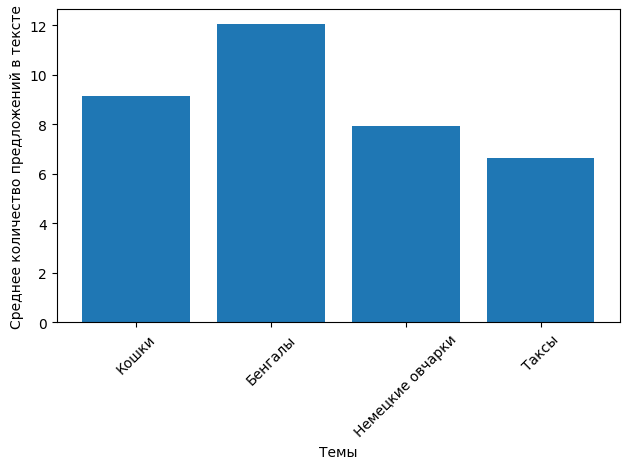

In [80]:
plt.bar(['Кошки', 'Бенгалы', 'Немецкие овчарки', 'Таксы'], [df1['amount'].mean(), df2['amount'].mean(), df3['amount'].mean(), df4['amount'].mean()])
plt.xlabel("Темы")
plt.ylabel("Среднее количество предложений в тексте")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p class="task" id="4"></p>

4\. Замените все текстовые смайлики из файла `livejounal/психология.csv` на соответствующие символы юникода. Для поиска смайликов воспользуйтесь регулярными выражениями. Ниже представлен список (не исчерпывающий) примеров возможных смайликов и символ, на который их нужно заменить:

* :=), =-), =-))), ))) и т.д. -> \u263A
* ;), ;-), ;-)) и т.д. -> \U0001F609
* :D, :-D, =-D, =-DDD и т.д. -> \U0001F600
* :=(, :-(, =-(((, (((, ;-( и т.д. -> \U0001F641

In [164]:
df = pd.read_csv('data\livejournal\психология.csv')
df.head()

,url,author,likes,text,comments
0,https://marikarai.livejournal.com/860.html?media,https://marikarai.livejournal.com/,23,"Выход из депрессии....\nСегодня, 24 марта, Меж...","['Спасибо за полезный пост! Кажется, что сейча..."
1,https://psychologies.livejournal.com/18496.htm...,https://psychologies.livejournal.com/,17,"Избегание, агрессия, пессимизм: 22 признака де...","['Знаете, я нашла в Вашем посте более сотни пр..."
2,https://kornilovasasha.livejournal.com/1458.ht...,https://kornilovasasha.livejournal.com/,67,"""Я чувствую, что не надо ехать"" - этого достат...",['Здравствуйте! Система категоризации Живого Ж...
3,https://rmnt-official.livejournal.com/118486.h...,https://rmnt-official.livejournal.com/,15,Пять причин беспорядка в доме и способы борьбы...,['Основных причин невозможности содержать в по...
4,https://kornilovasasha.livejournal.com/986.htm...,https://kornilovasasha.livejournal.com/,48,"Чувство Дома.\nКак эта шутка... ""Ты где?"" - ""Д...",['Ваша запись Чувство Дома в LiveJournal Media...


In [165]:
def replacing(text):
    smiles = {
        r':=\)+': '\u263A',
        r':-\)+': '\u263A',
        r':\)+': '\u263A', 
        r'=-\)+': '\u263A',  
        r'\)\)+': '\u263A', 

        r';\)+': '\U0001F609', 
        r';-\)+': '\U0001F609', 

        r':D+': '\U0001F600',
        r':-D+': '\U0001F600', 
        r'=-D+': '\U0001F600', 
        r';-D+': '\U0001F600',
        r';D+': '\U0001F600',

        r':=\(+': '\U0001F641',
        r':-\(+': '\U0001F641',
        r'=-\(+': '\U0001F641',
        r'\(\(+': '\U0001F641',
        r';-\(+': '\U0001F641',
        r':\(+': '\U0001F641'
    }

    for smile, code in smiles.items():
        text = re.sub(smile, code, text)

    return text

df['text'] = df['text'].apply(replacing)
df['comments'] = df['comments'].apply(replacing)

In [133]:
df['comments'][4][77:95]

'красивый рисунок ☺'

In [163]:
df['comments'][11][640:711]

'Ну в помещении же снег растает, который к одежде прилип, и будет мокро😄'

<p class="task" id="5"></p>

5\. Для каждого поста из файла `livejounal/психология.csv` создайте числовой вектор, в котором содержится следующая информация
    * количество абзацев
    * количество предложений
    * количество слов
    * количество смайликов \u263A
    * количество смайликов \U0001F609
    * количество смайликов \U0001F600
    * количество смайликов \U0001F641

Полученный результат представьте в виде тензора `torch.Tensor`.

In [166]:
def f(text):
    paragraphs = text.split('\n')
    text = text.replace('\n', ' ')
    sentences = sent_tokenize(text)
    words = text.split()

    smile1 = text.count('\u263A')
    smile2 = text.count('\U0001F609')
    smile3 = text.count('\U0001F600')
    smile4 = text.count('\U0001F641')

    return [len(paragraphs), len(sentences), len(words), smile1, smile2, smile3, smile4]

list_ = df['text'].apply(f).tolist()

tensor_ = torch.Tensor(list_)

In [167]:
tensor_

tensor([[9.5000e+01, 1.5100e+02, 2.2540e+03,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.9200e+02, 3.2600e+02, 4.5460e+03,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.4000e+01, 8.2000e+01, 8.7100e+02,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [3.0000e+00, 4.5000e+01, 6.7200e+02,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.0000e+00, 5.2000e+01, 9.4600e+02,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.0000e+00, 3.9000e+01, 9.4600e+02,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

<p class="task" id="6"></p>

6\. На основе файла `livejounal/психология.csv` выясните, кто из пользователей обладает наиболее широким словарным запасом (т.е. использовал максимальное количество различных слов в своих постах). При подсчете количества слов не учитывайте различные формы одного и того же слова, а также токены, не являющиеся словами (знаки препинания, цифры и т.д.). Выведите на экран имя пользователя и набор используемых им различных слов.

## Обратная связь
- [ ] Хочу получить обратную связь по решению